<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/Cryptocurrency_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import files
uploaded=files.upload()

Saving BTC-USD.csv to BTC-USD.csv
Saving LTC-USD.csv to LTC-USD.csv
Saving ETH-USD.csv to ETH-USD.csv


In [3]:
df_btc=pd.read_csv('BTC-USD.csv')
df_eth=pd.read_csv('ETH-USD.csv')
df_ltc=pd.read_csv('LTC-USD.csv')

In [6]:
df_btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-11,29424.902344,29517.773438,29253.517578,29397.714844,29397.714844,10195168197
1,2023-08-12,29399.787109,29465.113281,29357.587891,29415.964844,29415.964844,6194358008
2,2023-08-13,29416.593750,29441.433594,29265.806641,29282.914063,29282.914063,7329897180
3,2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304
4,2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,12640195779
...,...,...,...,...,...,...,...
362,2024-08-07,56040.632813,57726.882813,54620.507813,55027.460938,55027.460938,41637562185
363,2024-08-08,55030.027344,62673.765625,54766.726563,61710.136719,61710.136719,45298472567
364,2024-08-09,61728.207031,61751.863281,59587.859375,60880.113281,60880.113281,33425553115
365,2024-08-10,60881.230469,61464.511719,60287.566406,60945.812500,60945.812500,15745822278


In [8]:
df=pd.DataFrame({'BTC': df_btc['Adj Close'],
                 'ETH': df_eth['Adj Close'],
                 'LTC': df_ltc['Adj Close']
                 })
df

,BTC,ETH,LTC
0,29397.714844,1847.124390,83.495865
1,29415.964844,1848.889893,83.448524
2,29282.914063,1839.280151,81.978035
3,29408.443359,1844.185791,82.068581
4,29170.347656,1826.932739,79.273750
...,...,...,...
362,55027.460938,2336.589355,55.983910
363,61710.136719,2683.352783,61.223553
364,60880.113281,2599.598633,60.742867
365,60945.812500,2610.022949,61.174854


In [9]:
#statistics on the data
df.describe()

,BTC,ETH,LTC
count,367.000000,367.000000,367.000000
mean,49462.599248,2641.719171,74.103363
std,15715.863924,748.970931,9.840731
min,25162.654297,1539.612427,55.983910
25%,35984.291015,1961.081177,66.996376
50%,47771.277344,2528.369385,71.491547
75%,64849.404297,3335.013671,80.368465
max,73083.500000,4066.445068,109.258972


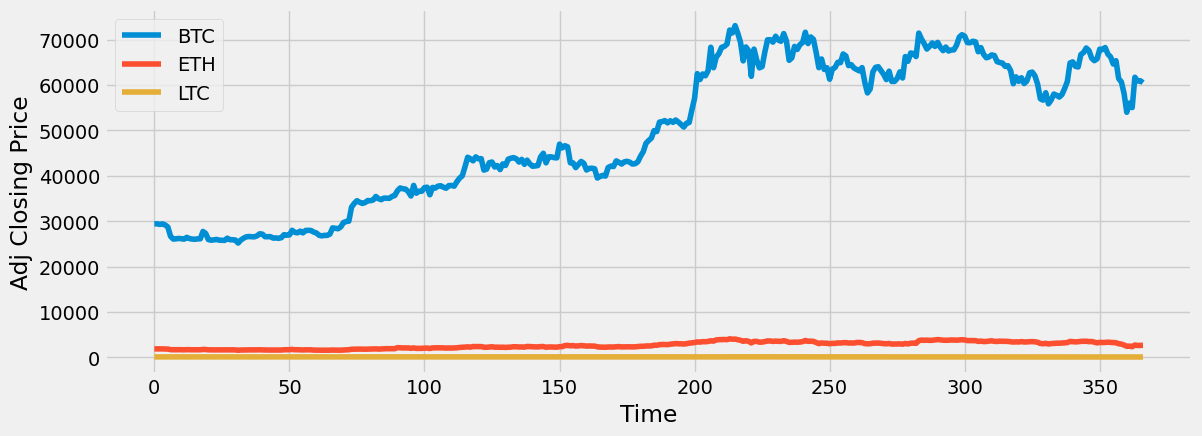

In [15]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

my_crypto=df
plt.figure(figsize=(12.5,4.5))
for c in my_crypto.columns:
  plt.plot(my_crypto[c],label=c)

plt.xlabel('Time')
plt.ylabel('Adj Closing Price')
plt.legend()
plt.show()

In [19]:
#scaling the data
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,100))
scaled=min_max_scaler.fit_transform(df)
scaled

array([[ 8.83761646, 12.16985874, 51.64133831],
       [ 8.87570009, 12.23972894, 51.55247684],
       [ 8.59805311, 11.85942112, 48.79229423],
       ...,
       [74.53428348, 41.94920506,  8.93280425],
       [74.67138294, 42.36174983,  9.74366581],
       [73.75951953, 43.38280253,  8.92144621]])

In [20]:
 #convert scaled data into dataframe
 df_scaled=pd.DataFrame(scaled,columns=df.columns)

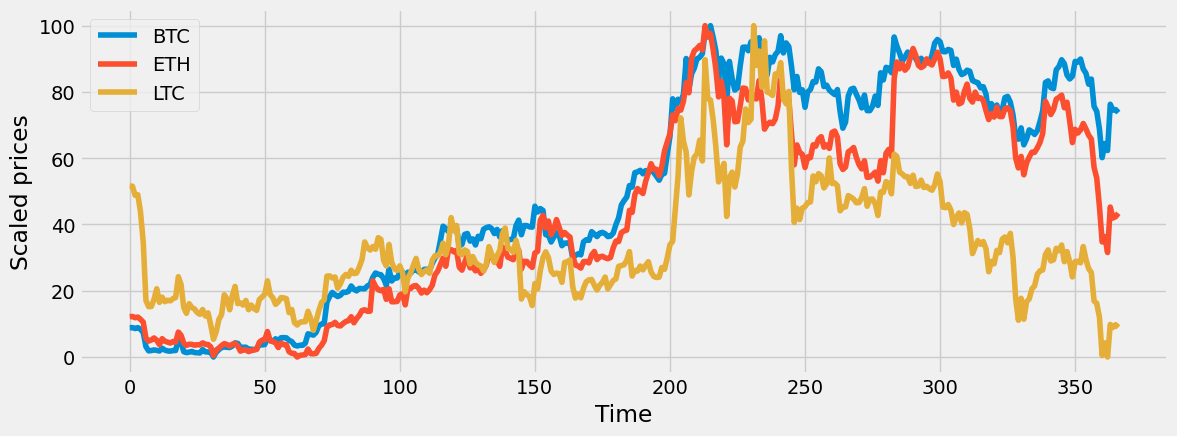

In [21]:
my_crypto=df_scaled
plt.figure(figsize=(12.5,4.5))
for c in my_crypto.columns:
  plt.plot(my_crypto[c],label=c)

plt.xlabel('Time')
plt.ylabel('Scaled prices')
plt.legend()
plt.show()

In [28]:
#find corr
my_crypto.corr()

,BTC,ETH,LTC
BTC,1.000000,0.673264,0.179740
ETH,0.673264,1.000000,0.154507
LTC,0.179740,0.154507,1.000000


In [23]:
DSR=my_crypto.pct_change(1)
DSR

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.004309,0.005741,-0.001721
2,-0.031282,-0.031072,-0.053541
3,0.030466,0.016370,0.003483
4,-0.056078,-0.056647,-0.107145
...,...,...,...
362,-0.032614,-0.132883,-1.000000
363,0.223764,0.435098,inf
364,-0.022711,-0.073228,-0.091740
365,0.001839,0.009834,0.090773


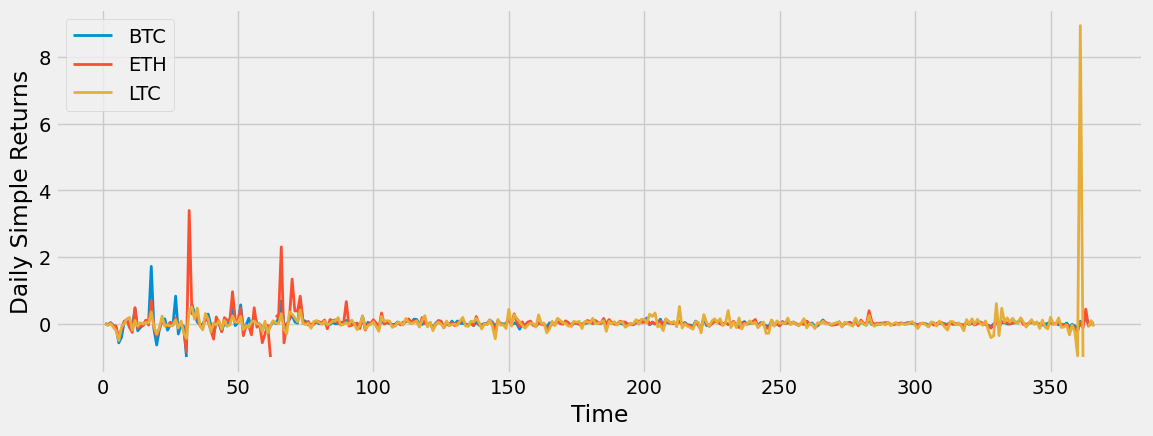

In [27]:
my_crypto=DSR
plt.figure(figsize=(12.5,4.5))
for c in my_crypto.columns:
  plt.plot(my_crypto[c],label=c,lw=2)

plt.xlabel('Time')
plt.ylabel('Daily Simple Returns')
plt.legend()
plt.show()

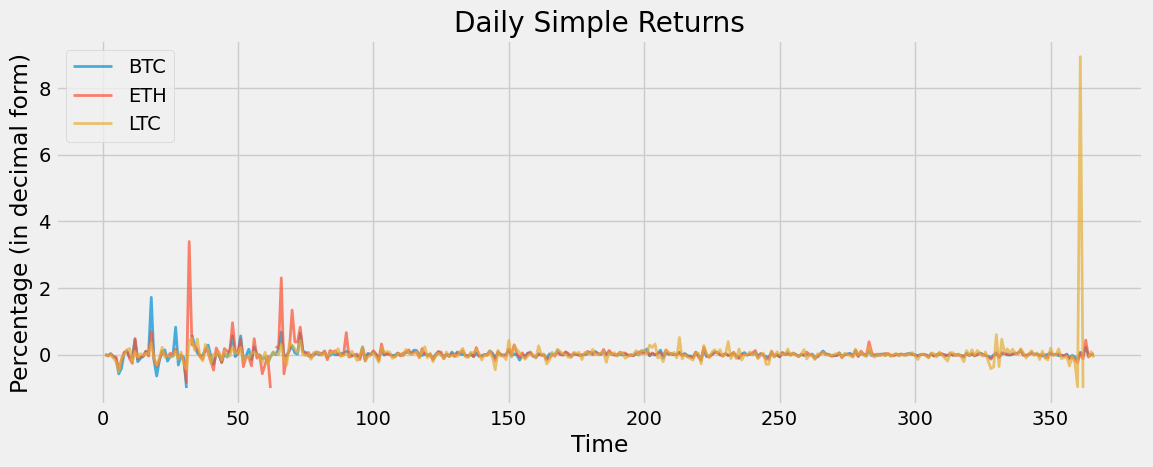

In [26]:
plt.figure(figsize=(12.5,4.5))
for c in DSR.columns:
  plt.plot(DSR.index,DSR[c],label=c,lw=2,alpha=.7)


plt.title('Daily Simple Returns')
plt.xlabel('Time')
plt.ylabel('Percentage (in decimal form)')
plt.legend()
plt.show()

<Axes: >

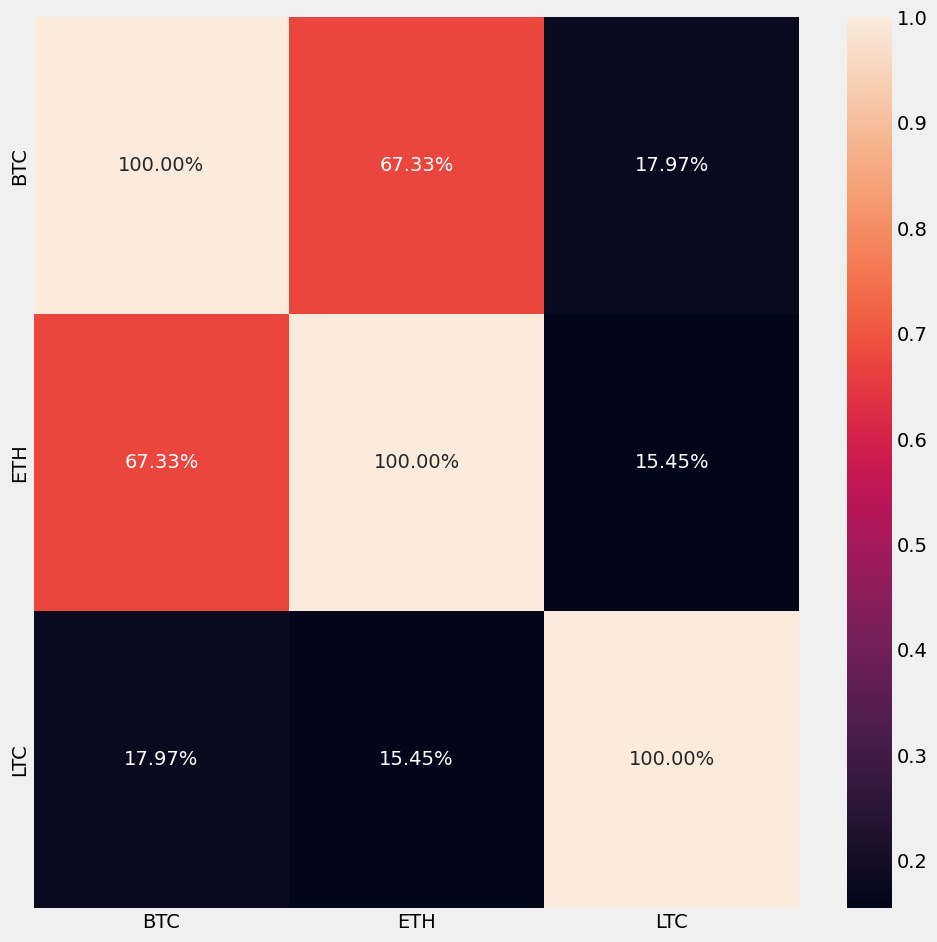

In [29]:
import seaborn as sns

plt.subplots(figsize=(11,11))
sns.heatmap(DSR.corr(),annot=True,fmt='.2%')